# DFS Demo: Exact Graph Coloring

This notebook demonstrates the DFS-based exact coloring on small and medium benchmark graphs.

In [1]:
# 1. Setup imports and module path
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

from dfs_coloring import DFSColoring, load_graph
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# 2. Load graphs
small_path = '../data/benchmarks/test_small20.txt'
med_path = '../data/benchmarks/test_medium40.txt'
test1 = '../data/benchmarks/test1.txt'
G_small = load_graph(small_path)
G_med = load_graph(med_path)
G_test1 = load_graph(test1)
print(f"Small graph: {G_small.number_of_nodes()} nodes, {G_small.number_of_edges()} edges")
print(f"Medium graph: {G_med.number_of_nodes()} nodes, {G_med.number_of_edges()} edges")
print(f"Test graph: {G_test1.number_of_nodes()} nodes, {G_test1.number_of_edges()} edges")


Small graph: 20 nodes, 32 edges
Medium graph: 40 nodes, 65 edges
Test graph: 138 nodes, 493 edges


In [3]:
# 3. Run DFS on small graph
solver_small = DFSColoring(G_small)
best_k_small, coloring_small, time_small = solver_small.run()
print(f"Small graph chromatic number: {best_k_small} (time: {time_small:.3f}s)")


Found solution with 3 colors: {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 1, 7: 1, 8: 2, 9: 2, 10: 1, 11: 3, 12: 1, 13: 1, 14: 2, 15: 1, 16: 2, 17: 1, 18: 1, 19: 3, 20: 2}
Small graph chromatic number: 3 (time: 0.001s)


In [ ]:
# 4. Run DFS on medium graph
solver_med = DFSColoring(G_med)
best_k_med, coloring_med, time_med = solver_med.run()
print(f"Medium graph chromatic number: {best_k_med} (time: {time_med:.3f}s)")


Found solution with 3 colors: {1: 2, 2: 3, 3: 1, 4: 2, 5: 2, 6: 1, 7: 2, 8: 2, 9: 1, 10: 1, 11: 3, 12: 1, 13: 1, 14: 3, 15: 2, 16: 1, 17: 3, 18: 2, 19: 2, 20: 1, 21: 3, 22: 2, 23: 1, 24: 2, 25: 2, 26: 2, 27: 2, 28: 1, 29: 3, 30: 1, 31: 3, 32: 2, 33: 1, 34: 3, 35: 3, 36: 2, 37: 2, 38: 2, 39: 2, 40: 3}
Medium graph chromatic number: 3 (time: 0.000s)


: 

In [ ]:
# 5. Run DFS on test graph
solver_test1 = DFSColoring(G_test1)
best_k_test1, coloring_test1, time_test1 = solver_test1.run()
print(f"Test graph chromatic number: {best_k_test1} (time: {time_test1:.3f}s)")

## Visualization of Small Graph

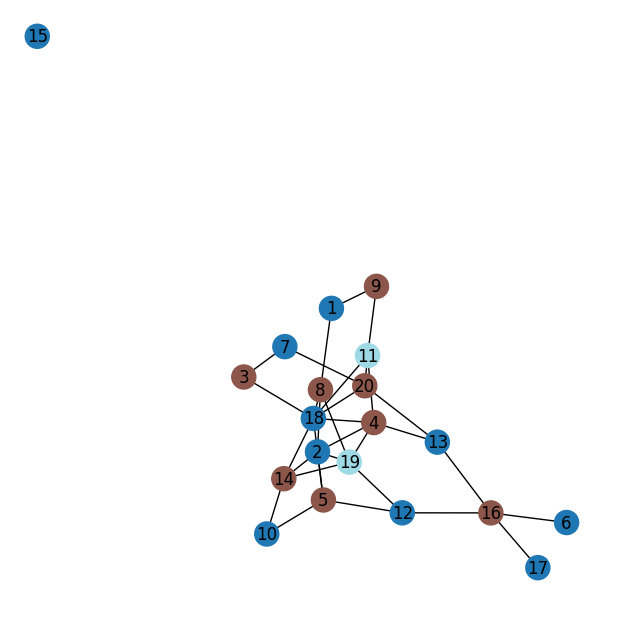

In [ ]:
# 6. Visualize small graph coloring
pos = nx.spring_layout(G_small, seed=1)
colors = [coloring_small[n] for n in G_small.nodes()]
plt.figure(figsize=(6,6))
nx.draw(G_small, pos, with_labels=True, node_color=colors, cmap='tab20', node_size=300)
plt.show()


## Visualization of Medium Graph Partial View

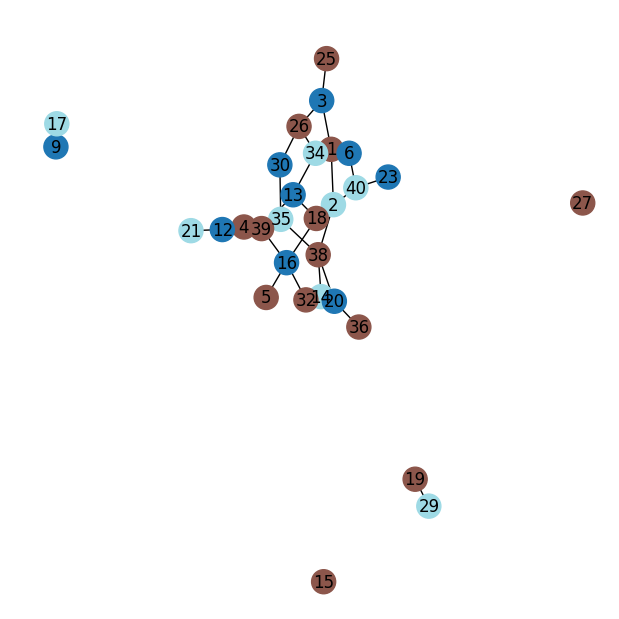

In [ ]:
# 7. Visualize 30-node subgraph of medium graph
import random
nodes = random.sample(list(G_med.nodes()), 30)
subG = G_med.subgraph(nodes)
pos_sub = nx.spring_layout(subG, seed=2)
colors_sub = [coloring_med[n] for n in subG.nodes()]
plt.figure(figsize=(6,6))
nx.draw(subG, pos_sub, with_labels=True, node_color=colors_sub, cmap='tab20', node_size=300)
plt.show()


In [ ]:
# 8. Visualize test graph coloring
pos_test1 = nx.spring_layout(G_test1, seed=3)
colors_test1 = [coloring_test1[n] for n in G_test1.nodes()]
plt.figure(figsize=(6,6))
nx.draw(G_test1, pos_test1, with_labels=True, node_color=colors_test1, cmap='tab20', node_size=300)
plt.show()

In [ ]:
# save the results to a csv file
import pandas as pd
results = {
    'Graph': ['Small', 'Medium', 'Test'],
    'Chromatic Number': [best_k_small, best_k_med, best_k_test1],
    'Time (s)': [time_small, time_med, time_test1]
}
df = pd.DataFrame(results)
df.to_csv('../results/dfs_results.csv', index=False)